# Análisis Exploratorio de Datos (EDA) Inicial:
- Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/BBDD/salariesds.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


In [54]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


In [55]:
df.columns = df.columns.str.lower().str.strip()

In [56]:
# Revisar duplicados.
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2025,MI,FT,Manager,27636,EUR,29090,AT,0,AT,M
73,2025,EN,FT,Data Analyst,65000,GBP,82278,GB,0,GB,M
128,2025,MI,FT,Manager,125000,USD,125000,US,0,US,M
129,2025,MI,FT,Manager,110000,USD,110000,US,0,US,M
134,2025,SE,FT,Solutions Architect,255000,USD,255000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
136460,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
136545,2021,MI,FT,Data Scientist,150000,USD,150000,US,100,US,M
136599,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
136679,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


In [59]:
# Borrar duplicados 11 columnas
df = df.drop_duplicates()

In [58]:
df.shape

(66063, 11)

In [60]:
# Verificar valores nulos
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [61]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,66063.000000,6.606300e+04,66063.000000,66063.000000
mean,2024.374294,1.620428e+05,151148.848084,24.672661
std,0.730968,2.953007e+05,77438.922472,42.970711
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,9.640000e+04,96000.000000,0.000000
50%,2024.000000,1.398000e+05,138900.000000,0.000000
75%,2025.000000,1.920000e+05,190067.500000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [62]:
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [98]:
# Agrupamos por agente  para ver los datos si se relaciona con los agentes nulos.
df.groupby(["job_title"])["salary_in_usd"].size().sort_index()


,salary_in_usd
job_title,
AI Architect,191
AI Content Writer,3
AI Data Engineer,2
AI Data Scientist,10
AI Developer,157
...,...
Technical Support Specialist,7
Technical Writer,27
Technology Integrator,10


In [95]:
print(Job_salary)

NameError: name 'job_salary' is not defined

In [33]:
# Eliminamos Outliear y vemos el tamaño de la data. No aplica eliminar
df[df["salary_in_usd"] > 750000]


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16196,2025,SE,FT,Architect,800000,USD,800000,US,0,US,M
39563,2025,SE,FT,Software Engineer,800000,USD,800000,US,0,US,M
56674,2025,EN,FT,Data Engineer,753480,EUR,793136,AT,0,AT,M
123027,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M
123870,2024,EN,FT,Data Analyst,774000,USD,774000,MX,0,MX,M


In [ ]:
df_1 = df

# Diagnóstico y Selección de Problema:
- Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
- Justificar la elección del problema y explicar por qué es relevante y desafiante.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

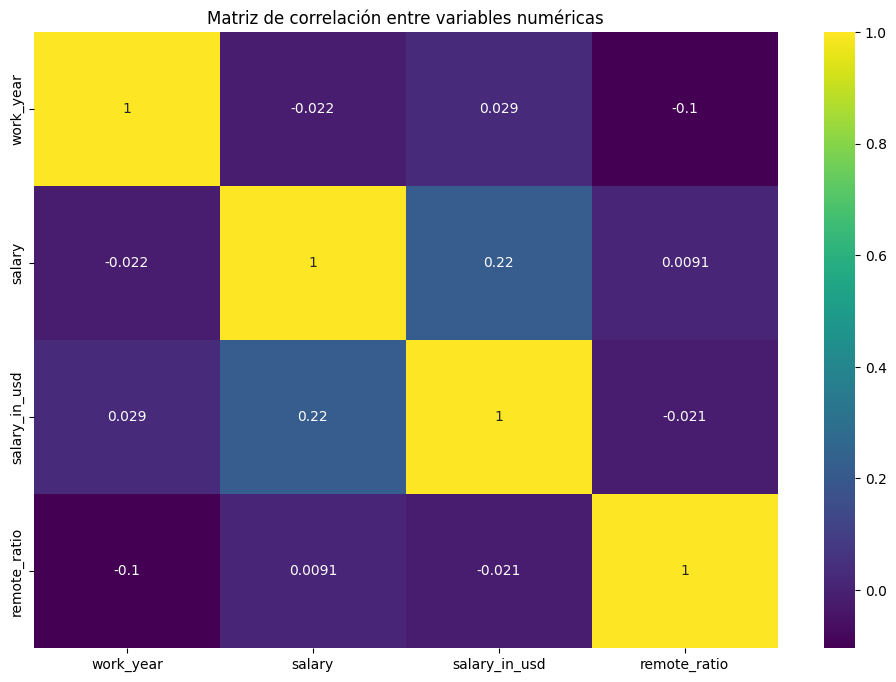

In [ ]:
# Correlación numérica generadas con las columnas númericas
num_df = df_1.select_dtypes(include=[np.number])
correlacion_matriz = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='viridis')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


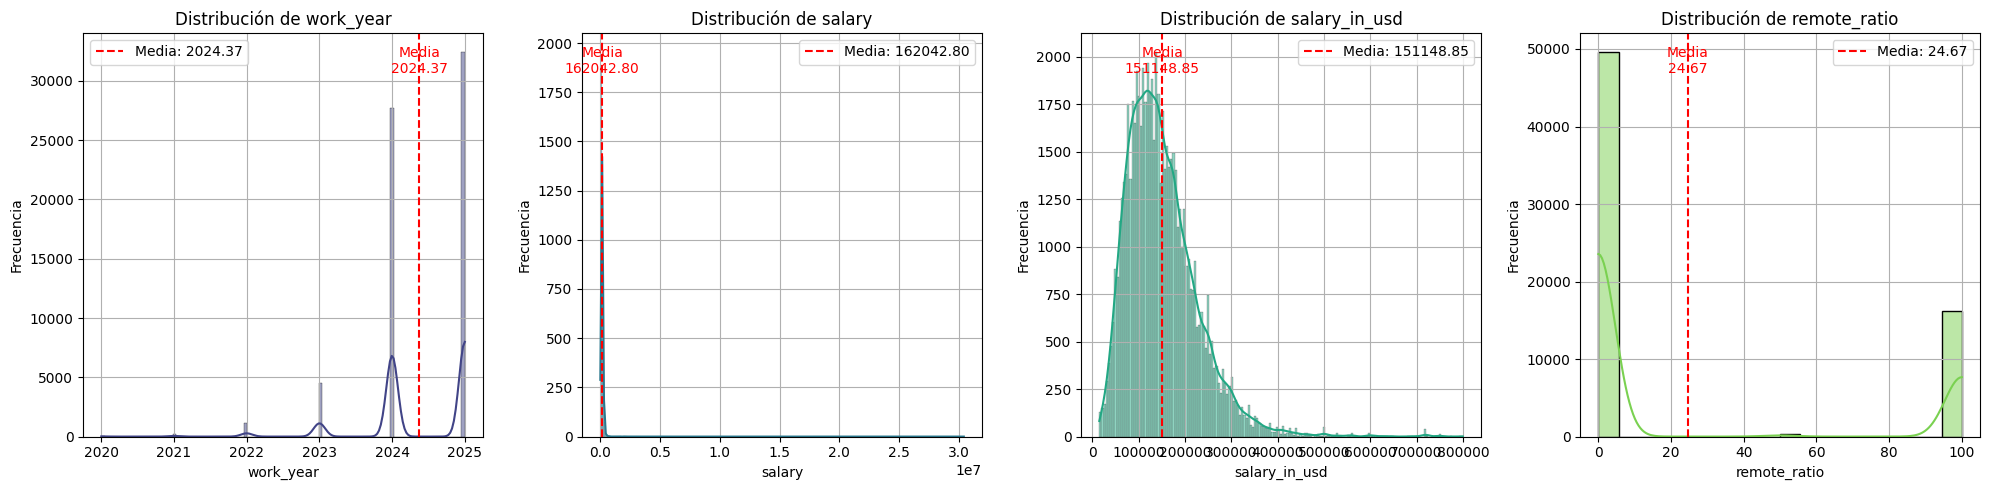

In [ ]:
# generar un color diferente para cada grafico
colors = sns.color_palette("viridis", len(num_df.columns))

# Create a grid of subplots
n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(num_df.columns) + n_cols - 1) // n_cols # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(num_df.columns):
    sns.histplot(num_df[col], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title("Distribución de " + col, fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frecuencia", fontsize=10)
    # agregar la grilla
    axes[i].grid(True, linestyle='-')
    # poner anotación de la media de cada grafico
    media = num_df[col].mean()
    axes[i].axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
    axes[i].text(media, axes[i].get_ylim()[1]*0.9, f'Media\n{media:.2f}',
             color='red', ha='center')

    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

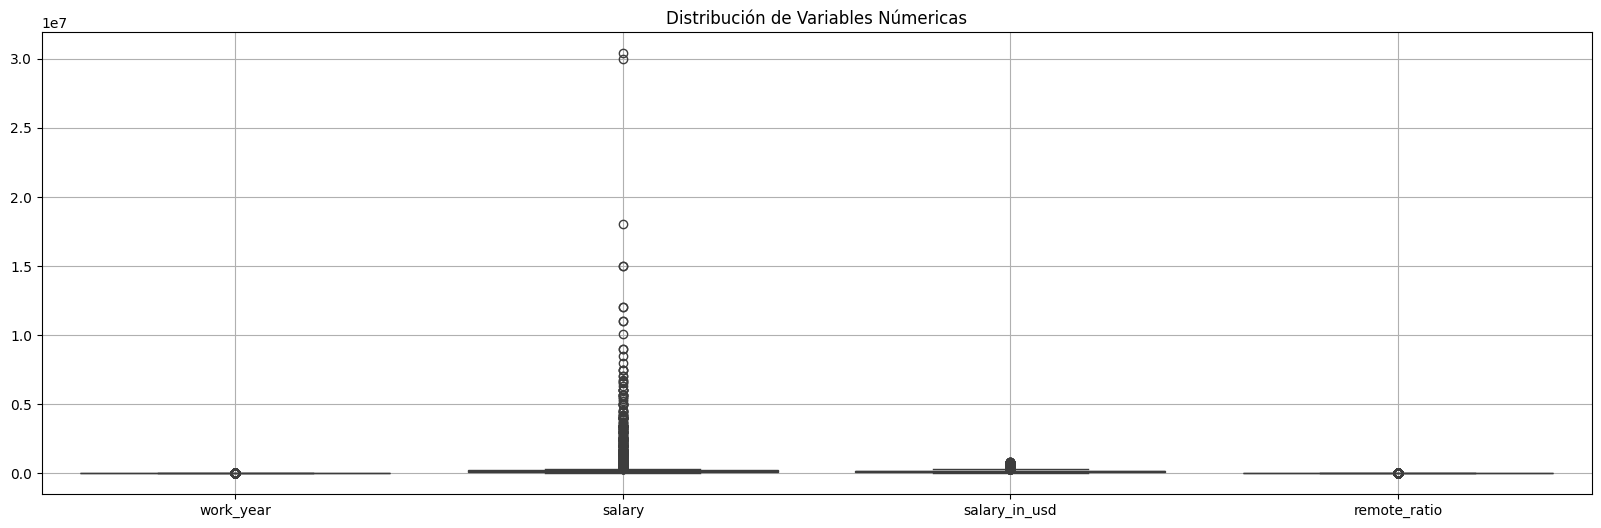

In [34]:
# Visualization 2: Boxplot para las variables numericas
#color = sns.color_palette("viridis")[1]
plt.figure(figsize=(20, 6))
sns.boxplot(data=num_df)
plt.title("Distribución de Variables Númericas")
plt.gca().grid(True, linestyle='-')
plt.show()

In [83]:
df_1

,salary_in_usd
job_title,
AI Architect,191
AI Content Writer,3
AI Data Engineer,2
AI Data Scientist,10
AI Developer,157
...,...
Technical Support Specialist,7
Technical Writer,27
Technology Integrator,10


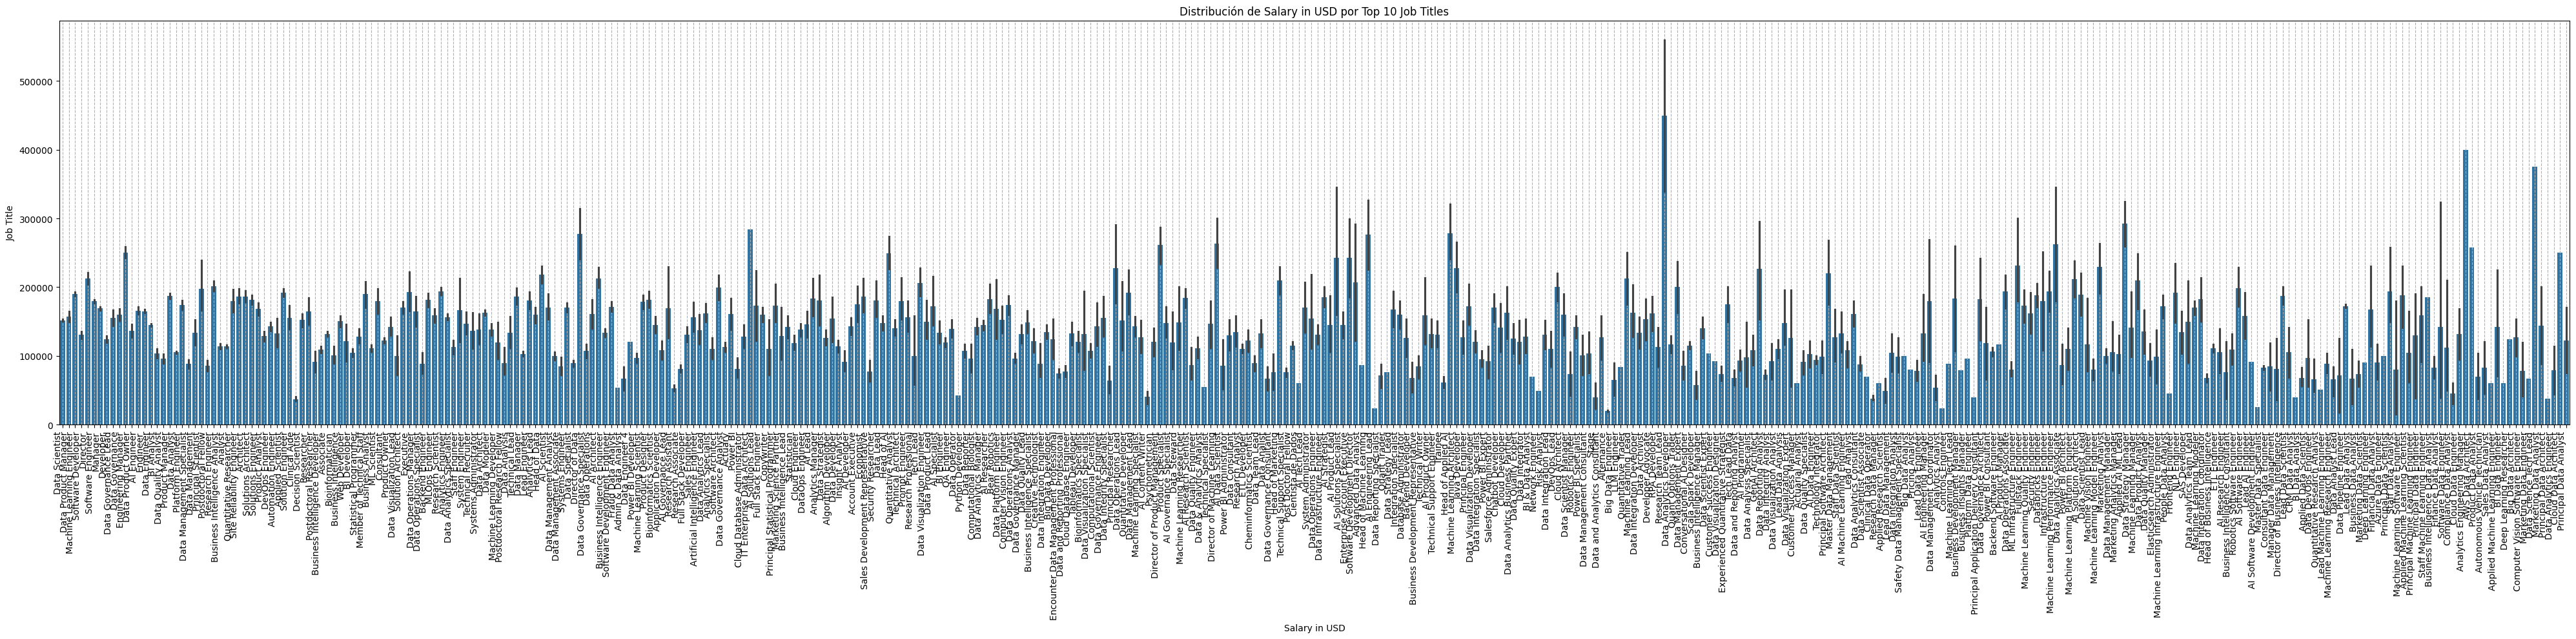

In [102]:

plt.figure(figsize=(40, 10))
sns.barplot(data=df, x='job_title', y='salary_in_usd')
plt.title("Distribución de Salary in USD por Top 10 Job Titles")
plt.xlabel("Salary in USD")
plt.ylabel("Job Title")
plt.xticks(rotation=90, ha='right')
plt.grid(axis='x', linestyle='--')

plt.tight_layout()
plt.show()

# 2.- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).

In [108]:
# Variables categóricas y numéricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariables categóricas:", cat_cols)
print("\nVariables numéricas:", num_cols)


Variables categóricas: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

Variables numéricas: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [106]:
# Variables numéricas
num_features = ['work_year', 'salary', 'remote_ratio']

# Variables categóricas
cat_features =  ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

In [109]:
# Features finales
X = df[num_features + cat_features]
y = df['salary_in_usd']

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [111]:
# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [112]:
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Regresion Lineal**

In [113]:
# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [114]:
# Entrenar
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['work_year', 'salary',
                                                   'remote_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'job_title',
                                                   'salary_currency',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('regressor', LinearRegression())])

In [115]:
# Evaluar
score = pipeline.score(X_test, y_test)

In [116]:
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.3f}")

MSE: 3197780620.08
RMSE: 56548.92
R^2: 0.455


Árbol desición

In [117]:
# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [118]:
# Pipeline con DecisionTreeRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42)) # Cambiado a DecisionTreeRegressor
])

In [119]:
# Entrenar el modelo de Árbol de Decisión
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['work_year', 'salary',
                                                   'remote_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'job_title',
                                                   'salary_currency',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [120]:
# Predecir en test
y_pred = pipeline.predict(X_test)

In [121]:
# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 71182673.04
RMSE: 8436.98


# 3.- Justificar la elección del problema y explicar por qué es relevante y desafiante.

### Resumen del EDA Inicial:

*   **Estructura de los Datos:** El conjunto de datos `salariesds.csv` contiene información sobre salarios en el campo de la ciencia de datos, con columnas como año de trabajo, nivel de experiencia, tipo de empleo, título del trabajo, salario en diferentes monedas, salario en USD, residencia del empleado, relación remota, ubicación de la empresa y tamaño de la empresa.
*   **Valores Nulos:** No se encontraron valores nulos en el conjunto de datos después de la limpieza inicial.
*   **Duplicados:** Se identificaron y eliminaron un número significativo de filas duplicadas, lo que resultó en un conjunto de datos más limpio.
*   **Estadísticas Descriptivas:** Las estadísticas descriptivas de las columnas numéricas (`work_year`, `salary`, `salary_in_usd`, `remote_ratio`) proporcionan una visión general de la distribución de estos valores, incluyendo la media, desviación estándar, valores mínimos y máximos. Se observó una amplia gama en los salarios.
*   **Correlación Numérica:** La matriz de correlación mostró una baja correlación entre las variables numéricas, lo que sugiere que no hay relaciones lineales fuertes entre ellas.
*   **Distribución de Variables Numéricas:** Los histogramas mostraron la distribución de las variables numéricas. Se observó que `salary` y `salary_in_usd` tienen distribuciones sesgadas hacia la derecha, lo que indica la presencia de salarios más altos.
*   **Distribución de Variables Categóricas:** Hemos explorado la distribución de `job_title` y la relación entre `employment_type` y `salary_in_usd`. Se identificó un gran número de títulos de trabajo únicos, y la agrupación por tipo de empleo mostró diferencias en las estadísticas salariales.
*   **Identificación de Outliers:** Se visualizó la distribución de las variables numéricas utilizando diagramas de caja, lo que ayudó a identificar posibles valores atípicos en los salarios. También se exploraron los salarios más altos para determinar si eran atípicos.
